In [2]:
from skimage import io,img_as_float
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img = img_as_float(io.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Banda2scenes/Banda2scenes_m007.png'))

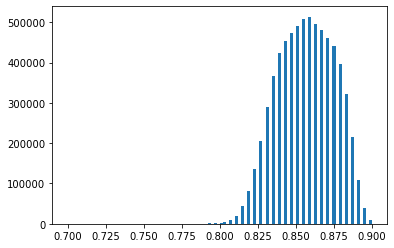

In [10]:
plt.hist(img.flat,bins=100,range=(0.7,0.9));
#histograma no diferencia bien background de los defectos

In [14]:
from skimage.color import rgb2gray
img = rgb2gray(img)
img.shape

(1920, 1216)

In [15]:
from skimage.restoration import denoise_nl_means, estimate_sigma
# Estimate the average noise standard deviation across color channels.
sigma_est = np.mean(estimate_sigma(img, multichannel=False, average_sigmas=True))
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")


Estimated Gaussian noise standard deviation = 0.005541120885189825


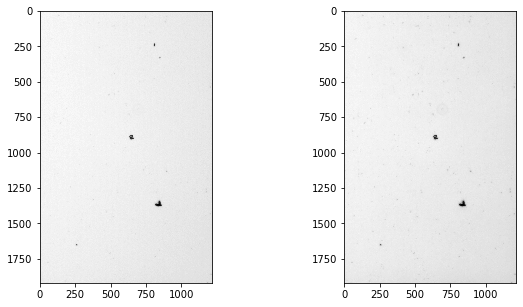

In [30]:
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=False)

# slow algorithm
denoised_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)



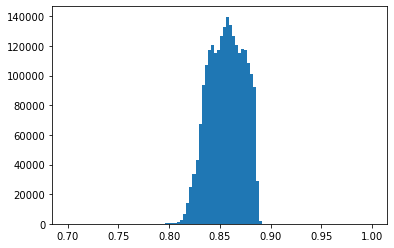

In [42]:
plt.hist(denoised_img.flat,bins=100,range=(0.7,1.0));
#histograma no diferencia bien background de los defectos

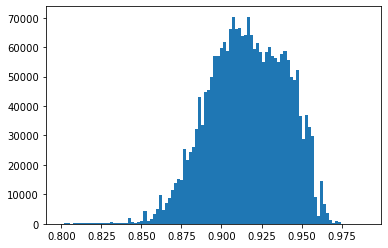

In [34]:
from skimage import exposure
eq_img = exposure.equalize_adapthist(denoised_img)
plt.hist(eq_img.flat,bins=100,range=(0.8,0.99));

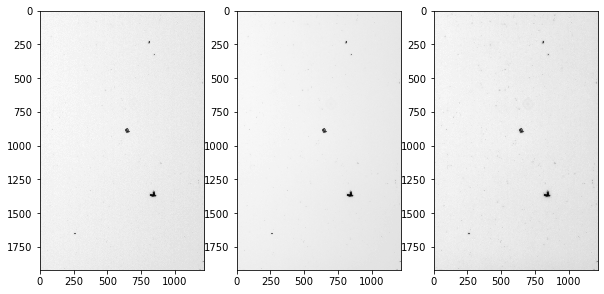

In [32]:
f,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(10,5))
ax0.imshow(img,cmap='gray')
ax1.imshow(denoised_img,cmap='gray')
ax2.imshow(eq_img,cmap='gray')

In [31]:
markers = np.zeros(img.shape,dtype=np.uint)

In [ ]:
markers[()] =